# Notebook to convert CAMELS data to a dataset of grayscale images

Download data from https://camels-multifield-dataset.readthedocs.io/en/latest/access.html

(15000, 256, 256)


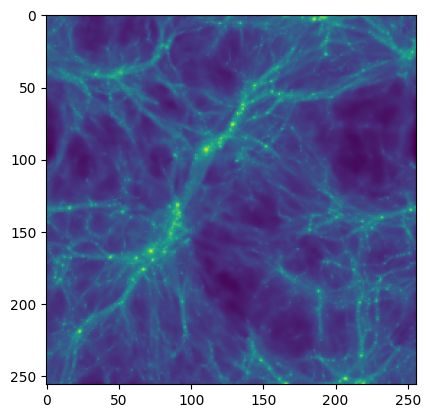

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# name of the file
#fmaps = 'CAMELS_data/Maps_Mtot_SIMBA_CV_z=0.00.npy'
fmaps = 'CAMELS_data/Maps_Mtot_SIMBA_LH_z=0.00.npy'

# read the data
maps = np.load(fmaps)
maps = np.log10(maps)
print(maps.shape)
plt.imshow(maps[10])

In [2]:
from PIL import Image

outpath = "maps"

mapmin, mapmax = maps.min(), maps.max()

for i in range(maps.shape[0]):
    nameimg = outpath+"/"+"map_"+str(i)+".png"
    fig, ax = plt.subplots(figsize=(2.56,2.56))
    fig.subplots_adjust(bottom=0, top=1, left=0, right=1)
    ax.imshow(maps[i],vmin=mapmin,vmax=mapmax,cmap="Greys")
    plt.axis('off')
    fig.savefig(nameimg, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    Image.open(nameimg).convert('L').save(nameimg)